In [11]:
%reset -f

In [12]:
import numpy as np
from scipy import integrate
from scipy import sparse
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
import time

In [13]:
### parameters ###
x_init = -3
k = 50
sig = 0.25

hbar = 1
m = 1

coeff = (hbar/(2*m))
A = coeff*(1j)
C = 1/((sig**2)*np.pi)    #normalization constant

print(A)

dx = 0.01                  #spatial grid spacing
x0 = -10.0
xf = 10.0
x = np.arange(x0,xf,dx)     #spatial grid points


dt = 0.001                       #temporal grid spacing
t0 = 0.0
tf = 0.2
t_eval = np.arange(t0,tf,dt)     #temporal grid points


figlength = 8
figheight = 8

xw = 1      #width of top hat
xc = 0      #center of top hat
xh = 1000   #height of top hat

0.5j


[-8.24689357e-171+2.78818373e-170j -6.30995793e-170+6.28247224e-170j
 -2.61401186e-169+7.60779106e-170j ...  0.00000000e+000+0.00000000e+000j
 -0.00000000e+000+0.00000000e+000j -0.00000000e+000+0.00000000e+000j]
[-8.24689357e-171 -6.30995793e-170 -2.61401186e-169 ...  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000]
[2.78818373e-170 6.28247224e-170 7.60779106e-170 ... 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


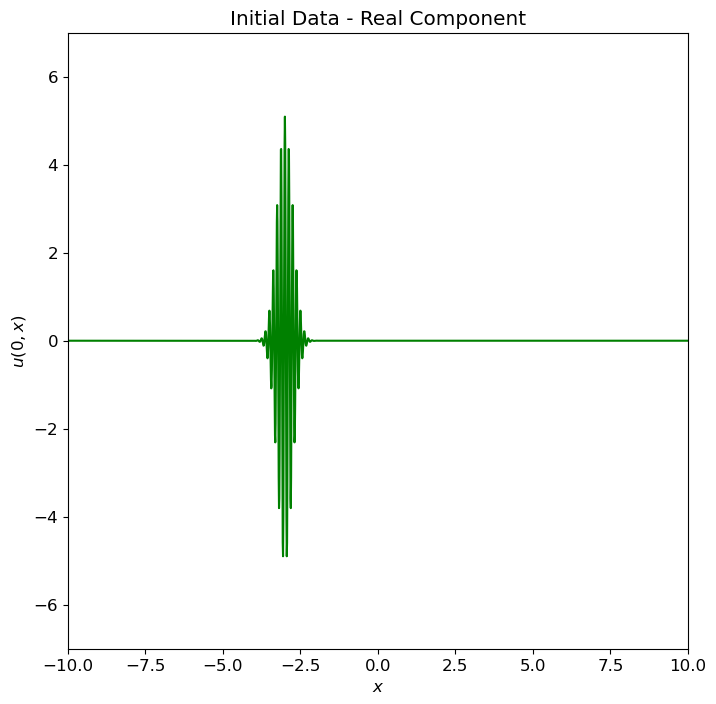

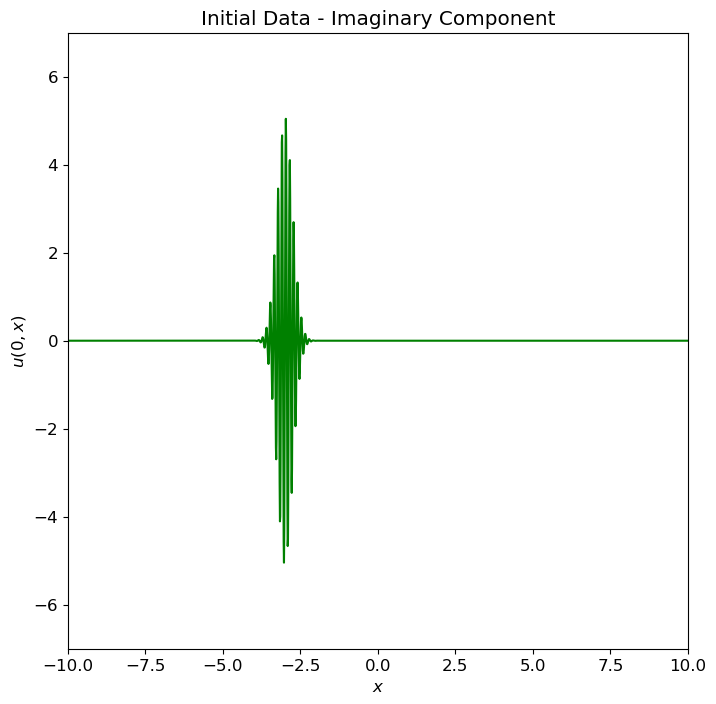

In [14]:
gauss_term = C*np.exp((-(x-x_init)**2)/(2*sig**2))
imaginary_term = np.exp(1j*k*(x-x_init))

psi_init = gauss_term*imaginary_term
    
print(psi_init)
#separate real and imaginary
yreal = np.real(psi_init)
print(yreal)
yimag = np.imag(psi_init)
print(yimag)

fig = plt.figure(figsize=(figlength,figheight))
fig.add_subplot(111)
plt.plot(x,yreal,color='g')
plt.xlabel('$x$')
plt.ylabel('$u(0,x)$')
plt.axis([x0,xf,-7,7])
plt.title('Initial Data - Real Component')
plt.show()

fig = plt.figure(figsize=(figlength,figheight))
fig.add_subplot(111)
plt.plot(x,yimag,color='g')
plt.xlabel('$x$')
plt.ylabel('$u(0,x)$')
plt.axis([x0,xf,-7,7])
plt.title('Initial Data - Imaginary Component')
plt.show()

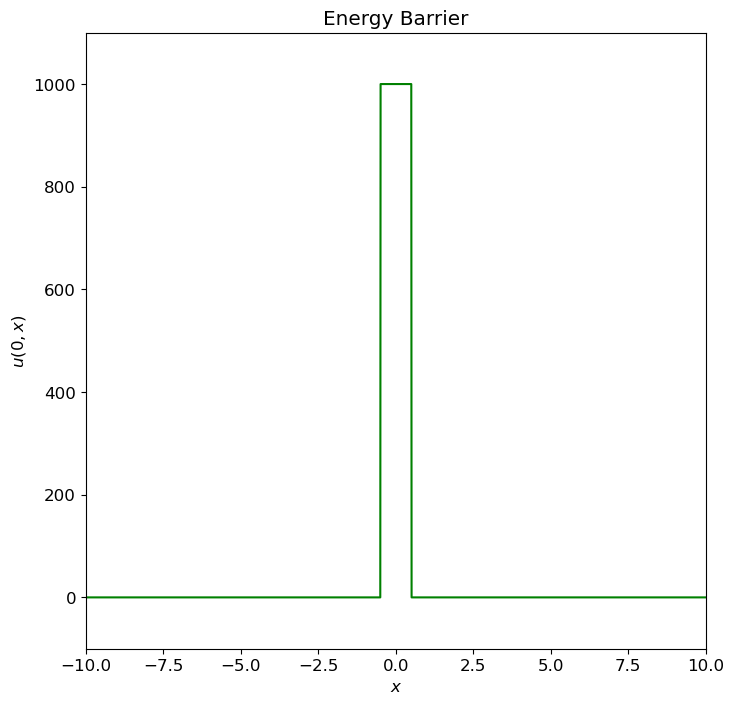

In [15]:
#Barrier - top hat

barr = np.zeros(len(x))
for i in np.arange(0,len(x)):
    if ((x[i] > (xc - 0.5*xw)) and x[i] < (xc + 0.5*xw)):
        barr[i] = xh
        
fig = plt.figure(figsize=(figlength,figheight))
fig.add_subplot(111)
plt.plot(x,barr,color='g')
plt.xlabel('$x$')
plt.ylabel('$u(0,x)$')
plt.axis([x0,xf,-100,1100])
plt.title('Energy Barrier')
plt.show()

In [16]:
### define finite difference laplace operator ###

DELSQ = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(len(x), len(x))) / dx**2

In [17]:
### define RHS of schrod equation ###
def dpsidt(t,psi):
    return A*(DELSQ.dot(psi))-((1j/hbar)*barr*psi)

In [18]:
### solve the ivp ###
tinit = time.time()
sol = integrate.solve_ivp(dpsidt,
                         t_span=[t0, tf],
                         y0=psi_init,
                         t_eval=t_eval,
                         method="RK23")
tfinal = time.time()
print("Time for solution = %5.2f seconds" % (tfinal-tinit) ) 
print(len(sol.t))

Time for solution = 21.78 seconds
200


In [19]:
print(len(sol.t))
### making the frames of the animation ###
for iframe in np.arange(0,len(sol.t)):

    output_filename = '%d.png' % iframe
    titlestring = "time = %5.3f" % t_eval[iframe]

    psi = sol.y[:,iframe]

    fig = plt.figure(figsize=(figlength, figheight))
    fig.add_subplot(111)
    plt.plot(x,psi)
    plt.xlabel('$x$')
    plt.ylabel('$psi(t,x)$')
    plt.title(titlestring)
    plt.axis([x0,xf,-5,5])
    plt.savefig(output_filename,format="png")
    plt.close(fig)

200


In [20]:
### stitching frames together to make animation ###
os.system("rm schroding.mp4")
os.system("ffmpeg -i %d.png -vf scale=800x800 schroding.mp4")
os.system("rm *.png")

ffmpeg version 2.8.15 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-36)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --extra-ldflags='-Wl,-z,relro ' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvorbis --enable-libv4l2 

0